### Verkosta noudettava tieto, jonka indeksissä on valmiiksi aikaleima: DataReader (aikasarjalle)


In [1]:
#Tuodaan käytettäväksi data-analytiikan kirjasto pandas ja lyhennetään sitä kutsuttavaksi aliaksella pd
## https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe
import pandas as pd

#Asetetaan näytettävien rivien rajoite (ei rajoitetta)
pd.options.display.max_rows = None
#Asetetaan näytettävien sarakkeiden rajoite (ei rajoitetta)
pd.options.display.max_columns = None

#Tuodaan graafiseen esittämiseen matplotlib ja sen käyttöliittymäksi pyplot
## https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html?highlight=pyplot#module-matplotlib.pyplot
import matplotlib.pyplot as plt

#Vaaditaan vanhoissa Juptter Notebook versioissa, jotta kaaviot tulostuvat
%matplotlib inline

#Valitaan graafinen esittäminen muotoiltavaksi tietyllä tyylillä
plt.style.use('seaborn-whitegrid')

#pandas_datareader asennetaan Anacondassa
import pandas_datareader as web
#Tuodaan käytettäväksi internetistä datan noutaja esim. Yahoo Financesta valuuttakursseille
## https://pydata.github.io/pandas-datareader/remote_data.html#forex
#DataReadilla noudetuissa tiedoissa on aikaleima valmiina indeksissä

Pörssiin liittyvää sanastoa löytyy sijainnista https://www.sijoitustieto.fi/Sijoitussanasto

Positiivinen tuotto markkinan
* noustessa = Bull (Bull market = nousukausi osakemarkkinoilla)
* laskiessa = Bear (Bear Market = laskukausi osakemarkkinoilla)


Osakesäästämisessä (esim. 15-30 vuotta) ja sijoittamisessa (esim. päivä - 3 vuotta) kilpaillaan verotonta talletuspankin korkotuotto vastaan (joka maksetaan kun varallisuus lepää riskittömästi tilillä). Tuottovertailujen tunnuslukuna on Alfa-kerroin. Mitä korkeampi alfa, sitä paremmin kohde on menestynyt vertailuindeksiin nähden.<br>
Sharpen mittari kertoo, kuinka paljon enemmän sijoitus on tuottanut verrattuna riskittömään talletukseen yhtä volatiliteettiyksikköä kohti. Mitä suurempi luku, sitä paremmin sijoitus on tuottanut suhteessa riskiinsä.

Arvo-osakkeessa on yleensä alhaiset tunnusluvut
* P/E (monenko vuoden osakekohtaisella voitolla pystyisi maksaman osakkeen hinnan)
* P/B (yhtiön taseen oman pääoman arvo suhteessa markkinakurssiin, miinusmerkkisen ollessa aliarvostettu)

perustuu tuotto-odotus pääasiassa liiketaoiminnalliseen tulokseen ja korkeaan osinkotuottoon.
Vastakohta tälle olisi kasvuosake, jonka tarjonnan ja kysynnän (niukkuus) arvon heilahtelulla yritetään tienata.<br>
HUOM! Korkea P/E & P/B luku voi kertoa huonosta liiketaoiminnallisesta tuloksesta ja/tai jälkimarkkinoilla niukasti tarjolla olevasta kohteesta, joka on kuitenkin suuren kysynnän kohteena.
Syklinen osake puolestaan on sellainen osake, jonka arvoon suhdanteiden muutokset vaikuttavat merkittävästi (esimerkiksi metsä- ja raskaan metalliteollisuuden osakkeet).

Likviditeetti eli rahaksimuutettavuus on esim. kryptovaluutoilla ehkä hankalampaa. Eli vaikka omistaisi kohde-etuutta (Nokian osake, Bitcoin tms) vaikka kuinka paljon on se arvotonta jos ei se muutu fiat:iksi (käteiseksi rahaksi kuten euro) jonka voi vaihtaa ruokaan lähikaupassa.<br>
Saturaatio eli kyllästyminen on sitä, että esim. Bitcoinin tarjonta alkaa ylittää kysynnän (Bear market), jolloin niin sanotusti markkina eli kysyntä ei enää kasva (Bull market) sen hyödykkeen osalta.



In [2]:
#Hae kohde-etuuden tunniste noudetettavasta kohteesta
## https://duckduckgo.com/?q=yahoo+finance+bitcoin
### https://duckduckgo.com/?q=yahoo+finance+nordea+bull+dax+10
gofore = web.DataReader('GOFORE.HE', start = '2015-1-1', data_source = 'yahoo')

#Tarkistetaan lähdetiedoston metatiedoista monessako sarakkeessa on minkäkin verran arvoja ja
#mitä tyyppiä ne sisältää. Samalla nähdään rivien kokonaismäärä
gofore.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 882 entries, 2017-11-16 to 2021-05-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       882 non-null    float64
 1   Low        882 non-null    float64
 2   Open       882 non-null    float64
 3   Close      882 non-null    float64
 4   Volume     882 non-null    float64
 5   Adj Close  882 non-null    float64
dtypes: float64(6)
memory usage: 48.2 KB


In [3]:
#Kurkataan 10 ensimmäistä riviä niinkuin Linuxissa
gofore.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-16,6.85,6.40,6.69,6.80,1994301.0,6.270185
2017-11-17,7.14,6.68,6.80,7.11,44764.0,6.556031
2017-11-20,7.16,6.92,7.14,7.16,27397.0,6.602135
2017-11-21,7.20,7.08,7.14,7.18,15960.0,6.620577
2017-11-22,7.20,7.15,7.19,7.15,12388.0,6.592915
2017-11-23,7.19,7.01,7.11,7.15,12248.0,6.592915
2017-11-24,7.17,7.10,7.16,7.17,11287.0,6.611356
2017-11-27,7.15,7.11,7.15,7.11,6821.0,6.556031
2017-11-28,7.18,7.10,7.15,7.15,7399.0,6.592915


<font color = 'grey'><i>Koeponnistamaton muistiinpano itselle talteen opetusalustan keskustelupalstalta</i>
<br>

Jos haluaa listautumispäivästä alkavat yhtä pitkät aikasarjat (esim. 1000 päivää) useammasta osakkeesta, joilla kaikilla on eri listautumispäivät, niin samaan dataframeen vierekkäin asetteleminen onnistuu esimerkiksi:
<br>

#Aikasarjoihin indeksiksi juokseva numerointi:
<br>
df.index = range(0, len(df))
</font>


In [4]:
#Hae kohde-etuuden tunniste noudetettavasta kohteesta
# https://duckduckgo.com/?q=yahoo+finance+ethereum
#Koska edellisellä kohde-etuudella ei ollut historiaa halutusta hetkestä alkaen,
#haetaan vertailtavalle kohteelle samalta ajanjaksolta tietoa
orion = web.DataReader('ORNBV.HE', start = '2017-11-16', data_source = 'yahoo')
#Kurkataan 5 viimeistä riviä niinkuin Linuxissa
orion.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-24,37.099998,36.840000,36.950001,37.099998,134405.0,37.099998
2021-05-25,37.160000,36.820000,36.990002,36.869999,236715.0,36.869999
2021-05-26,37.009998,36.110001,36.910000,36.330002,402725.0,36.330002
2021-05-27,36.689999,36.160000,36.389999,36.549999,691135.0,36.549999
2021-05-28,36.700001,36.169998,36.650002,36.230000,299294.0,36.230000


In [5]:
#Näytetään Orionin kymmenen pienintä arvoa sarakkeesta 'Low'
orion.nsmallest(n=10,columns='Low')
##Koronakeväällä 2020 ei vaikuttaisi olevan osuutta asiaan

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-03,23.330000,22.570000,22.870001,22.660000,543546.0,19.230034
2018-07-02,23.080000,22.580000,23.049999,22.709999,406491.0,19.272463
2018-07-05,23.070000,22.590000,22.650000,22.969999,452000.0,19.493111
2018-07-04,22.910000,22.620001,22.660000,22.680000,259428.0,19.247007
2018-04-26,23.570000,22.660000,22.850000,23.520000,868933.0,19.959858
2018-06-28,23.590000,22.660000,23.070000,22.840000,535295.0,19.382786
2018-04-25,24.049999,22.690001,24.000000,22.799999,1317248.0,19.348841
2018-06-26,23.299999,22.770000,23.250000,22.910000,616329.0,19.442192
2018-07-11,23.459999,22.770000,23.410000,22.780001,572164.0,19.331871


In [6]:
#Näytetään Goforen kymmenen pienintä arvoa sarakkeesta 'Low'
gofore.nsmallest(n=10,columns='Low')
##Vaikuttaisivat osuvan koronakeväälle 2020

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-18,5.58,4.80,5.38,5.00,10770.0,4.811060
2020-03-19,5.48,5.02,5.22,5.06,22639.0,4.868793
2020-03-23,5.20,5.02,5.18,5.14,6511.0,4.945770
2020-03-17,5.92,5.16,5.52,5.20,14867.0,5.003502
2020-03-24,5.80,5.16,5.16,5.42,14515.0,5.215189
2020-03-20,5.40,5.20,5.22,5.30,8920.0,5.099724
2020-03-16,6.14,5.42,6.14,5.50,15534.0,5.292166
2020-03-25,5.98,5.60,5.62,5.82,23314.0,5.600074
2020-03-26,6.20,5.70,5.90,5.92,34599.0,5.696295


### Kuvaileva analytiikka alkaa (aikasarjana)

<AxesSubplot:xlabel='Date'>

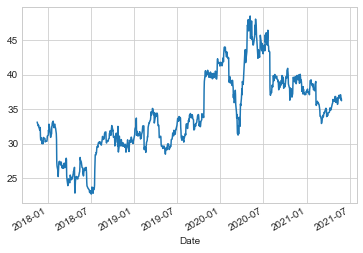

In [7]:
#Visualisoidaan päivän päätöshinta plottaamalla (esitetään kaaviona graafisesti) se aikasarjaksi
orion['Close'].plot()

<AxesSubplot:xlabel='Date'>

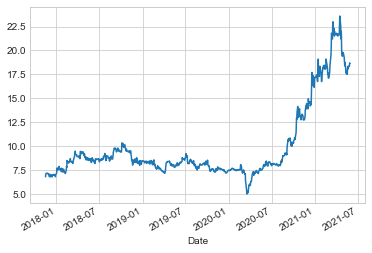

In [8]:
#Visualisoidaan päivän päätöshinta plottaamalla (esitetään kaaviona graafisesti) se aikasarjaksi
gofore['Close'].plot()

<AxesSubplot:xlabel='Date'>

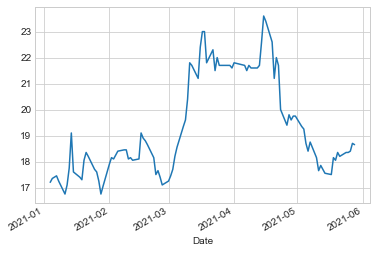

In [9]:
#Näytetään rajoittavan ehdon (vuosi 2021) jälkiset (kaksoispiste) havainnot 
gofore['Close']['2021':].plot()

<AxesSubplot:xlabel='Date'>

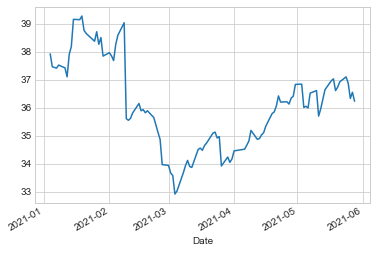

In [10]:
#Näytetään rajoittavan ehdon (vuosi 2021) jälkiset (kaksoispiste) havainnot 
orion['Close']['2021':].plot()

Suuruusluokaltaan eri hintaisten kohteiden yhdistäminen samaan kaavioon (vertailen niiden päätöshintojen kehitystä) jaetulla x-akselilla (vaaka-akseli) ja laittamalla molemmille omat y-akselit (pstyakseli)

(20.0, 50.0)

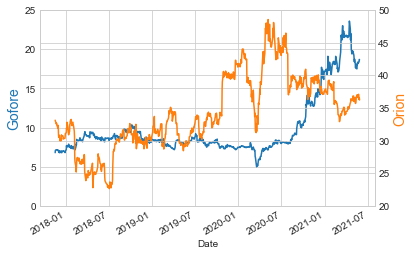

In [11]:
#Goforen päätöshinnat plotaten graafisena visualisointina
##ja väripaletin ensimmäisen värin sille lukitseminen
ax_gofore = gofore['Close'].plot(color = 'C0')

#Y-akselin nimeäminen Goforelle, väripaletin ensimmäisen värin sille lukitseminen ja kirjasimien säätäminen
ax_gofore.set_ylabel('Gofore', color = 'C0', fontsize = 14)

#Goforen y-akselin ala- ja yläarvon asettaminen
ax_gofore.set_ylim(0, 25)


#Goforen x-akselin jakaminen komennolla twinx() Orionin kanssa
ax_orion = ax_gofore.twinx()


#Orion päätöshinnat plotaten graafisena visualisointina (ja väripaletin toisen värin sille lukitseminen)
##sekä x-akselin osoittaminen (jaettuna "twinxinä")
orion['Close'].plot(ax = ax_orion, color = 'C1')

#Y-akselin nimeäminen Orionille, väripaletin toisen värin sille lukitseminen ja kirjasimien säätäminen
ax_orion.set_ylabel('Orion', color = 'C1', fontsize = 14)

#Orionin y-akselin ala- ja yläarvon asettaminen
ax_orion.set_ylim(20, 50)

Aggregointi on pienemmille havaintoyksiköille laskettujen tunnuslukujen yhdistämistä tai summaamista laajempien havaintoyksiköiden tasolle (esim. aikasarja päivätasolta kuukausitasolle)

Date
2017-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2018-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2018-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2018-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2018-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2019-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2019-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2019-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2019-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2020-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2020-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
2020-09-30    AxesSubplot(0.125,0.2;0.775x0.68)
2020-12-31    AxesSubplot(0.125,0.2;0.775x0.68)
2021-03-31    AxesSubplot(0.125,0.2;0.775x0.68)
2021-06-30    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: Q-DEC, Name: Close, dtype: object

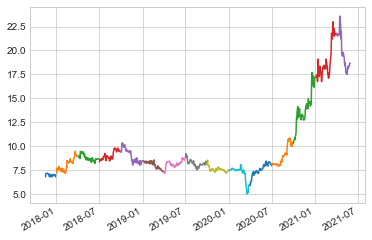

In [12]:
#Aggregointi komennolla resample ottaa parametrikseen
##kuukausitasolle M, kvarttaalille Q ja vuodelle Y
###plotaten niistä tunnuslukukokoelman graafisena esityksenä
gofore['Close'].resample('Q').plot()

<AxesSubplot:xlabel='Date'>

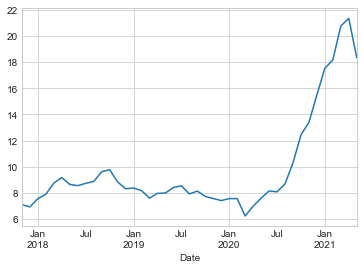

In [13]:
#Aggregoidaan yllä oleva keskiarvon eli mean() mukaan kuukausitasolle
gofore['Close'].resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

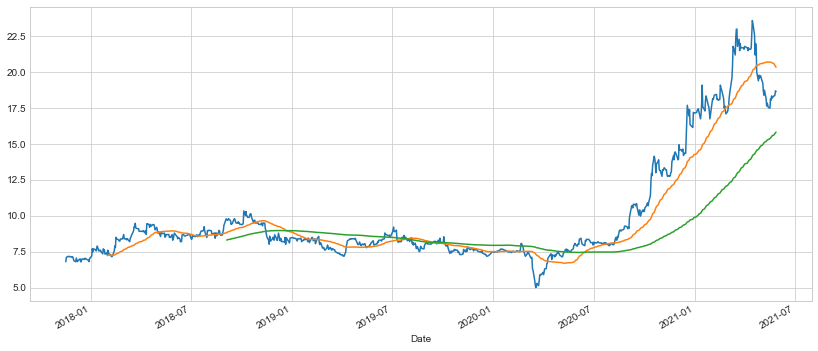

In [14]:
#Suurennetaan esitysaluetta oletuskoostaan suuremmaksi
gofore['Close'].plot(figsize=(14,6))


#Satunnaisvaihtelun tasaamiseen voidaan laskea liukuva keskiarvo
# https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp
##Liukuva keskiarvo voi olla singnaalina toimenpiteelle
##Jatkuvasti rullaava (liukuva, rolling) komento rolling() ottaa parametrikseen ajankohtien lukumäärän
###Lasketaan 50 viimeiselle päivälle jatkuvasti päivittyvänä (rullaavana, liukuvana) keskiarvo komennolla mean()
gofore['Close'].rolling(50).mean().plot()

#Samaan visualisointiin voidaan plotata (graafisesti esitettäväksi) useampia kaavioita samanaikaisesti
##Lasketaan Elisan osakkeen päätösluvulle 200 päivän liukuva keskiarvo
gofore['Close'].rolling(200).mean().plot()

Kuvailevan analytiikkan pohjalta suoritettava

TEKNINEN ANALYYSI

Jos osakkeen hinta (yllä olevassa kuviossa sininen käyrä) nousee lyhyemmän ajankohdan (50) liukuvan keskiarvonsa<br>
eli oranssi-käyrän yläpuolelle<br>
saattavat jotkut sijoittajat tulkita sen ostokehoitukseksi (Bull market).<br>

Jos osakkeen hinta (yllä olevassa kuviossa sininen käyrä) laskee lyhyemmän ajankohdan (50) liukuvan keskiarvonsa<br>
eli oranssi-käyrän alapuolelle<br>
saattavat jotkut sijoittajat tulkita sen myyntikehoitukseksi (Bear market).

**

Jos lyhyemmän ajankohdan (50) oranssi-käyrä ylittää pidemmän ajankohdan (200) vihreän-käyrän (Golden Cross)<br>
saattavat jotkut sijoittajat tulkita sen ostokehoitukseksi (Bull market).<br>
<br>
Ja jos lyhyemmän ajankohdan (50) oranssi-käyrä alittaa pidemmän ajankohdan (200) vihreän-käyrän (Death Cross)<br><br>
saattavat jotkut sijoittajat tulkita sen myyntikehoitukseksi (Bear market).<br><br>

**

Kuvion esimerkistä voisi kehitellä jonkun oman version yhdistelemällä ne:<br>
JOS<br>
lyhyemmän ajankohdan (50) oranssi-käyrä on ylempänä kuin pidemmän ajankohdan (200) vihreä-käyrä (Golden Cross)<br>
JA<br>
osakkeen hinta (yllä olevassa kuviossa sininen käyrä) on ylempänä kuin lyhyemmän ajankohdan (50) oranssi-käyrä<br>
NIIN<br>
osta.<br>
<br>
JOS lyhyemmän ajankohdan (50) oranssi-käyrä alittaa pidemmän ajankohdan (200) vihreän-käyrän (Death Cross)<br>
JA<br>
osakkeen hinta (yllä olevassa kuviossa sininen käyrä) on alempana kuin lyhyemmän ajankohdan (50) oranssi-käyrä<br>
NIIN<br>
myy.<br>
<b>Liukuvan keskiarvon ongelma on kuitenkin se, että se on vain ja ainoastaan historiadataa eikä kerro mitään tulevaisuudesta</b>

Liukuvan keskiarvon tyypillisimmät pituudet ovat 10, 20, 50, 100 ja 200 (ne voivat olla minuutteja, päiviä, viikkoja jne).
https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp<br>
Lyhyen ajan treidaajalle saattaa 20 olla käyttökelpoisempi kuin pidemmän ajan sijoittajalle 100. Eräs lähestymistapa on yhdistää ne. Kun esim. 15 ylittää 45 (Golden Cross) on se ostokehoitus (Bull market). Ja jos 15 alittaa 45 (Death Cross) on se myyntikehoitus (Bear market).
<br>
Esim. viiden päivän liukuva keskiarvo laskee siis yhteen viisi viimeisintä kaupankäynnin kohteen sulkemisarvoa (kohde-etuudelle kuten esim. Elisan osake) ja jakaa sen viidellä. Toisinsanoen joka päivä saadaan uusi edellisten viiden sulkemishinnan keskiarvo (jatkuvasti rullaavana eli siis päivittyvänä tietona). Ja koska ne kaikki ovat yhteydessä toisiinsa saadaan niistä piirrettyä jatkuvasti virtaava käyrä.<br>
<b>Liukuvan keskiarvon ongelma on se, että se on vain ja ainoastaan historiadataa eikä kerro mitään tulevaisuudesta</b>

In [15]:
#Usein tarkoituksenmukaisempaa on tarkastella muutosta prosentuaalisena
##Luodaan DataFrameen uusi sarake nimeltä "Gofore %" ja sijoitettaan sen arvoksi
##taulukon "Close" sarakkeesta komennolla "pct_change()" laskettu prosentuaalinen muutos
##Muutos on verrattuna edelliseen eli tässä tapauksessa edelliseen pörssinkäyntipäivään
gofore['Gofore %'] = gofore['Close'].pct_change()
gofore.tail()

,High,Low,Open,Close,Volume,Adj Close,Gofore %
Date,,,,,,,
2021-05-24,18.400000,18.250000,18.250000,18.350000,1708.0,18.350000,0.008242
2021-05-25,18.700001,18.350000,18.350000,18.350000,3553.0,18.350000,0.000000
2021-05-26,18.650000,18.299999,18.600000,18.400000,5200.0,18.400000,0.002725
2021-05-27,18.799999,18.350000,18.799999,18.700001,4506.0,18.700001,0.016304
2021-05-28,18.799999,18.650000,18.750000,18.650000,3427.0,18.650000,-0.002674


In [16]:
orion['Orion %'] = orion['Close'].pct_change()
orion.tail()

,High,Low,Open,Close,Volume,Adj Close,Orion %
Date,,,,,,,
2021-05-24,37.099998,36.840000,36.950001,37.099998,134405.0,37.099998,0.004875
2021-05-25,37.160000,36.820000,36.990002,36.869999,236715.0,36.869999,-0.006199
2021-05-26,37.009998,36.110001,36.910000,36.330002,402725.0,36.330002,-0.014646
2021-05-27,36.689999,36.160000,36.389999,36.549999,691135.0,36.549999,0.006056
2021-05-28,36.700001,36.169998,36.650002,36.230000,299294.0,36.230000,-0.008755


In [17]:
#Liitetään konkatenoinnilla juuri luodut muutosprosentti-sarakket kolmanteen taulukkoon
muutokset = pd.concat([gofore['Gofore %'], orion['Orion %']], axis = 1)
muutokset.tail()

,Gofore %,Orion %
Date,,
2021-05-24,0.008242,0.004875
2021-05-25,0.000000,-0.006199
2021-05-26,0.002725,-0.014646
2021-05-27,0.016304,0.006056
2021-05-28,-0.002674,-0.008755


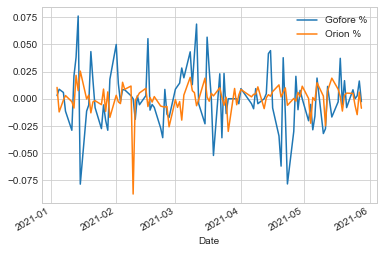

In [18]:
#Edellä esitetyn datan visualisointi
##Näytetään rajoittavan ehdon (vuosi 2021) jälkeen (kaksoispiste)
##plottaamalla (kaavio graafisesti esitettäväksi)
ax1 = muutokset['2021':].plot()

In [19]:
#Lisätään y-akselille selite
ax1.set_ylabel('Muutos')

Text(3.200000000000003, 0.5, 'Muutos')

Text(0, 0.5, 'Muutos')

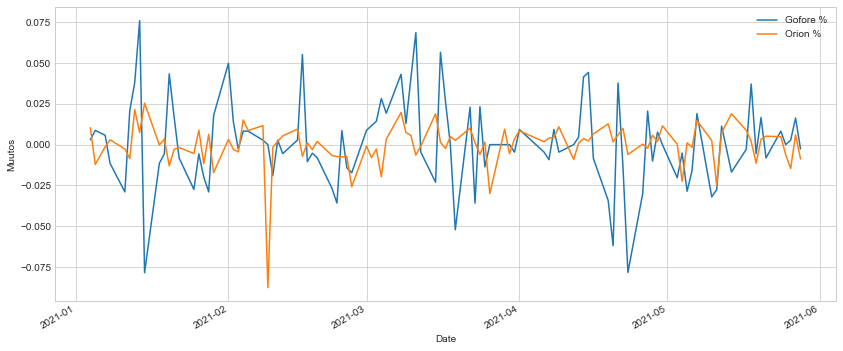

In [20]:
ax1 = muutokset['2021':].plot(figsize=(14,6))
ax1.set_ylabel('Muutos')

In [21]:
#Tunnuslukukokoelman saa komennolla describe()
muutokset.describe()

,Gofore %,Orion %
count,881.000000,881.000000
mean,0.001416,0.000302
std,0.023321,0.019947
min,-0.112903,-0.117865
25%,-0.009524,-0.008852
50%,0.000000,0.000974
75%,0.010840,0.010427
max,0.091142,0.096861


Kohteen arvon heilahtelua ja sen rajuutta (ennakoinnin kannalta paljon heilahteleva on korkea riskinen) kuvataan volatiliteetilla. Volatiliteetti voi tosin muuttua.
<br>
https://fi.wikipedia.org/wiki/Volatiliteetti
<br>
Aiemmin laskettiin päivittäiset muutosprosentit. Niistä voidaan ottaa keskihajonta ja aggregoinnin tapaan skaalata se vuositasolle (vuoden kaupantekopäivien lukumäärän kerrotaan neliöjuurella), jolloin saadaan volatiliteetti vuoden aikahorisontilla

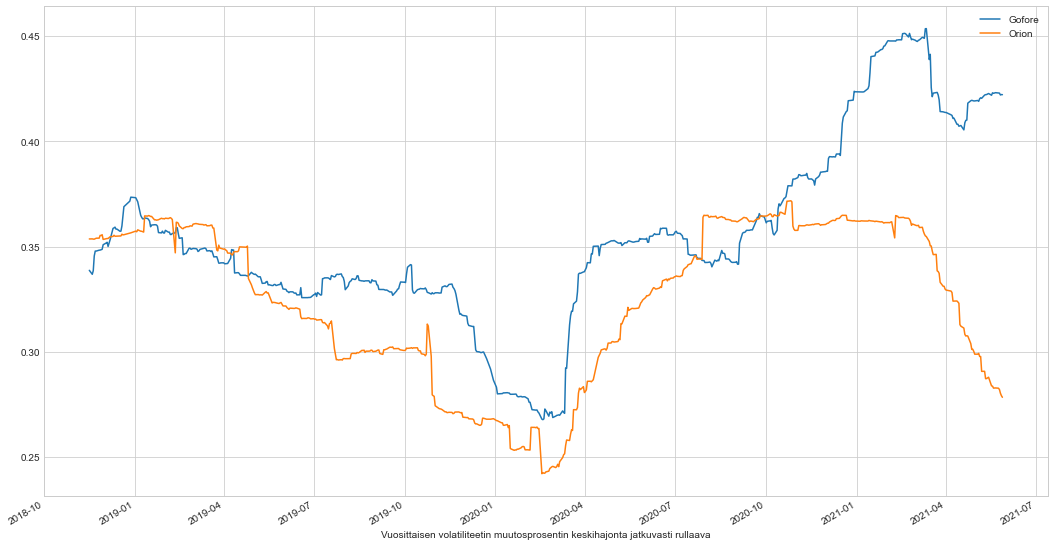

In [72]:
#Vuosittaisen volatiliteetin muutosprosentin keskihajonta jatkuvasti rullaava (liukuva, rolling)
##Komento rolling() ottaa parametrikseen ajankohtien lukumäärän
##Lasketaan vuoden kaupantekopäivien (252 päivää) muutosprosenteille jatkuvasti päivittyvänä (rullaavana, liukuvana)
##keskihajonta (standard deviation) komennolla std() ja skaalataan se neliöjuurella kertomalla vuosittaiseksi
##sekä esitetään se plotaten graafisena visualisointina (lopulta suurennetaan esitysaluetta oletuskoostaan suuremmaksi)
(muutokset['Gofore %'].rolling(252).std() * (252**0.5)).plot(label = 'Gofore', legend = True, figsize=(18,10))
(muutokset['Orion %'].rolling(252).std() * (252**0.5)).plot(label = 'Orion', legend = True, figsize=(18,10), xlabel='Vuosittaisen volatiliteetin muutosprosentin keskihajonta jatkuvasti rullaava')

plt.gcf().savefig('example_volatilite.png', bbox_inches = 'tight')


Yllä olevaa kuviota tulkitaan siten, että mitä matalammalla oleva käyrä sitä vähäriskisempi kohde. Etenkin Goforen kurssiheilahtelu on viimeaikoina ollut niin rajua, että kohde-etuus on ollut korkea riskinen (mitä korkeampi riski sitä suurempi tuotto-odotus ja mahdollisuus menettää sijoitus)

In [23]:
#Milloin muutos (prosentuaalisesti) on ollut suurempaa kuin 9 sadasosaa
##Komennolla abs() saadaan "Absolute numeric values"
muutokset[
    (abs (muutokset['Gofore %']) > 0.09)
        | #putkitus on "Or" eli suomeksi tai
    (abs (muutokset['Orion %']) > 0.09)
    ]

,Gofore %,Orion %
Date,,
2018-02-07,-0.005556,-0.105039
2018-02-15,0.091142,0.026923
2018-04-24,0.000000,-0.102110
2018-07-18,0.020882,0.091858
2018-10-24,0.020000,0.096861
2018-10-25,0.000000,-0.102154
2019-02-12,-0.040476,-0.102919
2019-10-24,0.000000,0.094618
2020-03-12,-0.112676,-0.044406


### Kuvaileva analytiikka loppuu (aikasarjana)

### Selittävä analytiikka alkaa

Edellä ilmenneet merkittävät muutokset (yli 9%:a päiväkohtaisesti) kohde-etuudessa ajoittuvat tietenkin tietyille kaupankäyntipäiville (pörssin aukioloaikoina)


Tarkastellaan onko kalenteriviikonpäivällä yhteyttä positiiviseen kehitykseen?

In [24]:
#Luodaan uusi sarake ja asetetaan siihen arvoksi
#viikonpäivän järjestysluku (tietokoneella indeksin laskenta alkaa nollasta)
muutokset['Viikonpäivä'] = muutokset.index.weekday
muutokset.head()

,Gofore %,Orion %,Viikonpäivä
Date,,,
2017-11-16,NaN,NaN,3
2017-11-17,0.045588,-0.004226,4
2017-11-20,0.007032,-0.009397,0
2017-11-21,0.002793,-0.003978,1
2017-11-22,-0.004178,0.003687,2


In [25]:
#Selitettävän muuttujan (aikaleima) "kategorioille" (viikonpäivä) voidaan laskea tunnuslukukokoelma
#SELITTÄVÄN muuttujan määrällisillä arvoilla
muutokset.groupby('Viikonpäivä') ['Gofore %'].describe()
##Tunnuslukukokoelman saa komennolla describe()

,count,mean,std,min,25%,50%,75%,max
Viikonpäivä,,,,,,,,
0,175.0,-0.001136,0.023531,-0.112903,-0.011711,0.0,0.009988,0.061321
1,178.0,0.002354,0.022734,-0.061947,-0.007869,0.0,0.010790,0.087719
2,178.0,0.002294,0.021211,-0.071111,-0.006591,0.0,0.010923,0.080139
3,176.0,0.001460,0.024362,-0.112676,-0.010944,0.0,0.009133,0.091142
4,174.0,0.002082,0.024725,-0.078534,-0.010397,0.0,0.012999,0.088421


In [26]:
#Selitettävän muuttujan (aikaleima) "kategorioille" (viikonpäivä) voidaan laskea tunnuslukukokoelma
#SELITTÄVÄN muuttujan määrällisillä arvoilla
muutokset.groupby('Viikonpäivä') ['Orion %'].describe()
##Tunnuslukukokoelman saa komennolla describe()

,count,mean,std,min,25%,50%,75%,max
Viikonpäivä,,,,,,,,
0,175.0,0.001162,0.015433,-0.040507,-0.009471,0.001078,0.011141,0.050077
1,178.0,-0.001339,0.021127,-0.102919,-0.008777,-0.000673,0.010629,0.079554
2,178.0,0.000528,0.023201,-0.117865,-0.007616,0.001232,0.010886,0.096861
3,176.0,-0.000954,0.021707,-0.102154,-0.010954,-0.000919,0.008550,0.094618
4,174.0,0.002157,0.017077,-0.074162,-0.006782,0.002265,0.009852,0.073651


Viikonpäivä ei vaikuta olevan selittävä tekijä kohteen arvon kehitykseen

In [27]:
#Eri toimialoilla olevien kohde-etuuksien välisen korrelaation tutkiminen
##drop() pudottaa tässä laskutoimituksessa nimetyn sarakkeen pois, mutta
##ei poista sitä alkuperäisestä taulukosta
muutokset.drop('Viikonpäivä', axis = 1).corr()

,Gofore %,Orion %
Gofore %,1.000000,0.102453
Orion %,0.102453,1.000000


Eri toimialoilla olevien Goforen ja Orionin välillä ei <b>pitkällä aikavälillä</b> ole riippuvuutta

In [28]:
gofore2 = web.DataReader('GOFORE.HE', start = '2021-1-1', data_source = 'yahoo')
orion2 = web.DataReader('ORNBV.HE', start = '2021-1-1', data_source = 'yahoo')


gofore2['Gofore2 %'] = gofore2['Close'].pct_change()
orion2['Orion2 %'] = orion2['Close'].pct_change()

muutokset2 = pd.concat([gofore2['Gofore2 %'], orion2['Orion2 %']], axis = 1)

muutokset2.corr()

,Gofore2 %,Orion2 %
Gofore2 %,1.000000,0.000941
Orion2 %,0.000941,1.000000


Eri toimialoilla olevien Goforen ja Orionin välillä ei <b>lyhyellä aikavälillä</b> ole lähestulkoon lainkaan riippuvuutta ja aika näyttää kehittyykö se jopa negatiiviseksi

Mitä kauempana nollasta sitä suurempi riippuvuus:
<br>
Positiivinen korrelaatio tarkoittaa sitä, että kun toinen kasvaa tai laskee, niin toinen seuraa myös perässä.
<br>
Negatiivinen eli käänteinen korrelaatio tarkoittaa sitä, että kun toinen menee yhteen suuntaan, niin toinen menee vastakkaiseen suuntan.

Korrelaatiokertoimen osalta (otoskoon ollessa vähintään 30)
<br>
alle 0,3 tulos kertoo siitä, että muuttujien välillä ei ole juurikaan suoraviivaista riippuvuutta
<br>
tulos 0,3-0,7 kertoo siitä, että muuttujien välillä on jonkin verran suoraviivaista riippuvuutta
<br>
yli 0,7 tulos kertoo siitä, että muuttujien välillä on selvä suoraviivainen riippuvuus

<AxesSubplot:xlabel='Gofore %', ylabel='Orion %'>

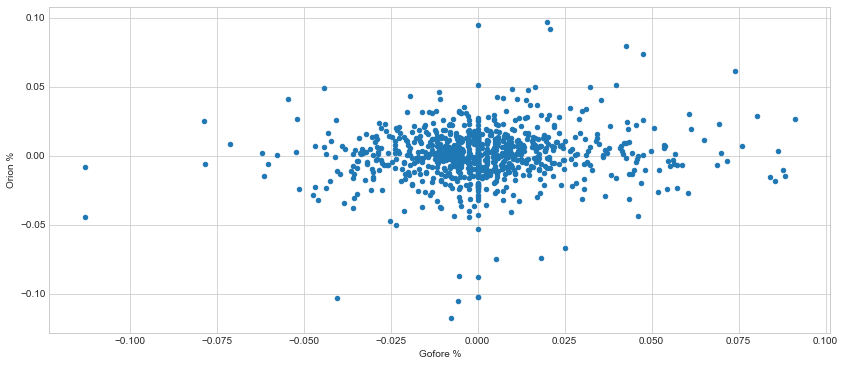

In [29]:
#Edellä oleva datataulukko (pitkä aikaväli) voidaan esittää plotaten graafisena esityksenä hajontakaaviona
muutokset.plot.scatter(x = 'Gofore %', y = 'Orion %', figsize=(14,6))

Kun näkymään piirretään (molempien muuttujien keskiarvon kohdalta aloittaen) risti, silloin on
<br>
<font color ='tomato'><b>havaintojen keskittyminen</b></font>:
<br><br>
<b>vasempaan alakulmaan</b> (lohko 3 on molemmilla muuttujilla negatiivista eli alle keskiviivan)
<br>
TAI
<br>
<b>oikeaan yläkulmaan</b> (lohko 1 on molemmilla muuttujilla positiivista eli yli keskiviivan)
<br>
--> riippuvuus on positiivinen ≈ <b>vertailtavien kohteiden välillä on (positiivinen) riippuvuus</b>
***
<b>vasempaan yläkulmaan</b> (lohko 2 on y-akselin muuttujalla positiivista eli yli keskiviivan ja x-akselin muuttujalla negatiivista eli alle keskiviivan)
<br>
TAI
<br>
<b>oikeaan alakulmaan</b> (lohko 4 on y-akselin muuttujalla negatiivista eli alle keskiviivan ja x-akselin muuttujalla positiivista eli yli keskiviivan)
<br>
--> riippuvuus on negatiivinen ≈ <b>vertailtavien kohteiden välillä on (negatiivinen) riippuvuus</b>


Kun havainnot jakaantuvat tasaisesti kaikkiin lohkoihin ei riippuvuutta juurikaan ole


<AxesSubplot:xlabel='Gofore2 %', ylabel='Orion2 %'>

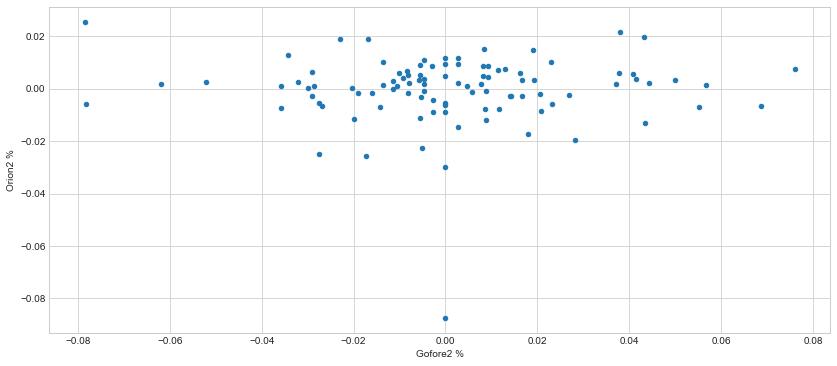

In [30]:
#Edellä oleva datataulukko (lyhyt aikaväli) voidaan esittää plotaten graafisena esityksenä hajontakaaviona
muutokset2.plot.scatter(x = 'Gofore2 %', y = 'Orion2 %', figsize=(14,6))

<AxesSubplot:xlabel='Date'>

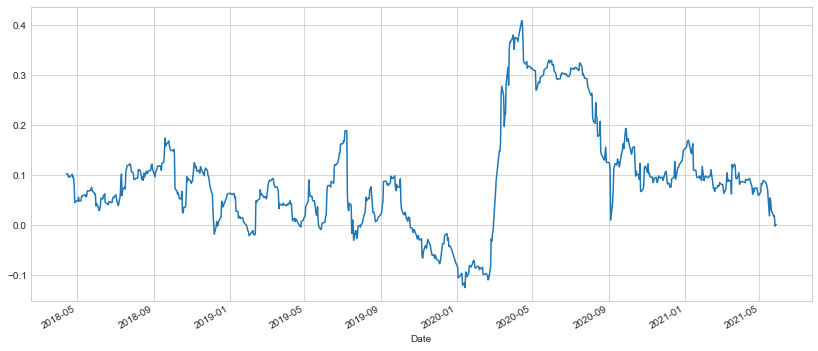

In [31]:
#Satunnaisvaihtelun tasaamiseen voidaan laskea liukuva keskiarvo
# https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp
#Jatkuvasti rullaava (liukuva, rolling) komento rolling() ottaa parametrikseen ajankohtien lukumäärän
##Lasketaan 100 viimeiselle päivälle jatkuvasti päivittyvänä (rullaavana, liukuvana)
##korrelaatio tutkittaville kohde-etuuksille komennolla corr()
##ja esitetään se plotaten graafisena visualisointina
muutokset['Gofore %'].rolling(100).corr(muutokset['Orion %']).plot(figsize=(14,6))

Yllä olevasta kaaviosta on havaittavissa, että vielä satunnaisvaihteluiden tasaamisen jälkeenkään korrelaatiota vertailtavien kohde-etuuksien osalta ei ole (<i>aiemmin pitkällä ajanjaksolla korrelaatiokertoimia laskettaessa < 0,3 = muuttujien välillä ei ole juurikaan suoraviivaista riippuvuutta</i>), sillä satunnaisesti riippuvuus on hetkellisesti ollut positiivinen (<i>0,3-0,7 = "ainoastaan jonkin verran riippuvuutta esiintyy"</i>) ja välillä alle nollan (käyrän ollessa yllä olevassa kaaviossa alle nolla-viivan on kohde-etuuksien arvot kehittyneet vastakkaisiin suuntiin).


<AxesSubplot:xlabel='Date'>

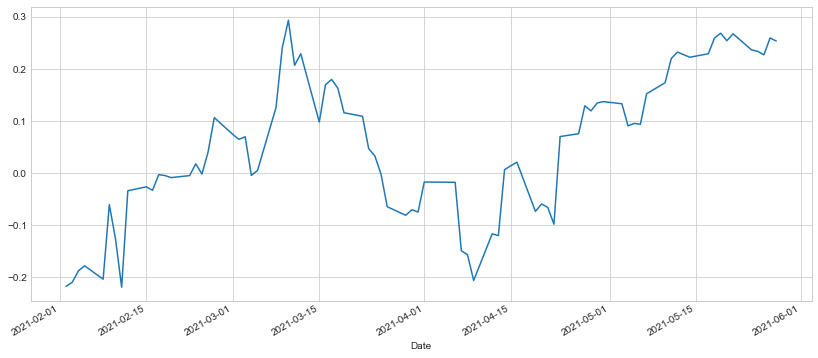

In [32]:
muutokset2['Gofore2 %'].rolling(20).corr(muutokset2['Orion2 %']).plot(figsize=(14,6))

Myöskään lyhyen ajan satunnaisvaihteluiden tasaamisen jälkeen kuukauden jaksoissakaan ei korrelaatiota vertailtavien kohde-etuuksien osalta ole 

<i>< 0,3 = muuttujien välillä ei ole juurikaan suoraviivaista riippuvuutta</i>

<b>Hajautettaessa varoja siten, ettei kaikki munat ole samassa korissa haetaan mielellään lievästi negatiivisessa korrelaatiossa olevia kohteita, jotta ne tasoittavat arvoa syöviä muutoksia</b>

<i>0,3-0,7 kertoo siitä, että muuttujien välillä on jonkin verran suoraviivaista riippuvuutta</i>

### Selittävä analytiikka loppuu

In [33]:
#Kryptovaluutta ethereum
eth = web.DataReader('ETH-EUR', start = '2015-1-1', data_source = 'yahoo')
eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 617 entries, 2019-09-17 to 2021-05-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       617 non-null    float64
 1   Low        617 non-null    float64
 2   Open       617 non-null    float64
 3   Close      617 non-null    float64
 4   Volume     617 non-null    float64
 5   Adj Close  617 non-null    float64
dtypes: float64(6)
memory usage: 33.7 KB


In [34]:
#Kryptovaluutta bitcoin
bit = web.DataReader('BTC-EUR', start = '2015-1-1', data_source = 'yahoo')
bit.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 617 entries, 2019-09-17 to 2021-05-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       617 non-null    float64
 1   Low        617 non-null    float64
 2   Open       617 non-null    float64
 3   Close      617 non-null    float64
 4   Volume     617 non-null    float64
 5   Adj Close  617 non-null    float64
dtypes: float64(6)
memory usage: 33.7 KB


<AxesSubplot:xlabel='Date'>

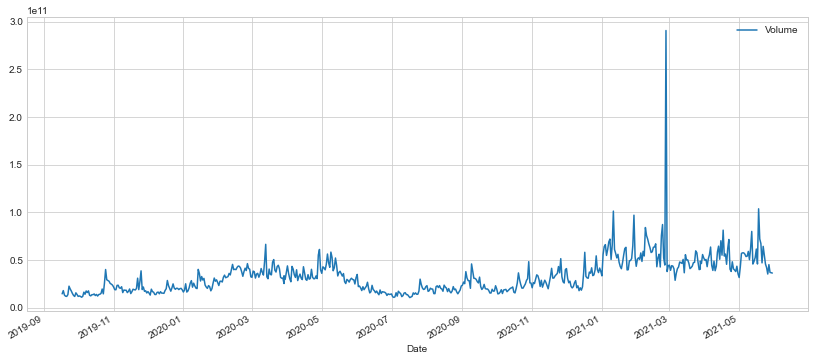

In [35]:
bitcoin_volume = bit.drop(['High', 'Low', 'Open', 'Close', 'Adj Close'], axis = 1)
bitcoin_volume.plot(figsize=(14,6))

<AxesSubplot:xlabel='Date'>

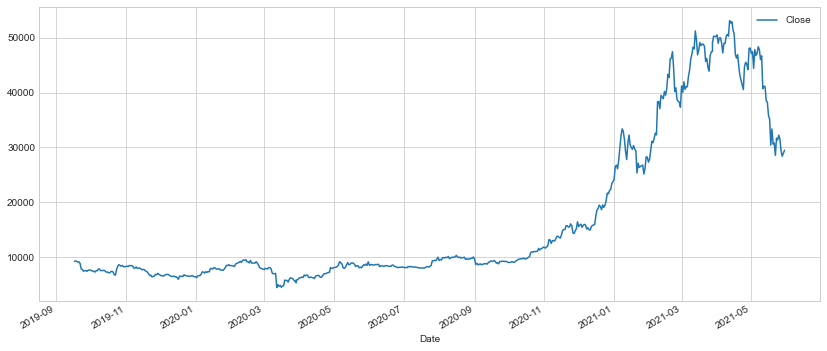

In [36]:
bitcoin_close = bit.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis = 1)
bitcoin_close.plot(figsize=(14,6))

In [37]:
bitcoin_close.head()

,Close
Date,
2019-09-17,9246.486328
2019-09-18,9292.973633
2019-09-19,9239.483398
2019-09-20,9092.541992
2019-09-21,9138.951172


<AxesSubplot:xlabel='Date'>

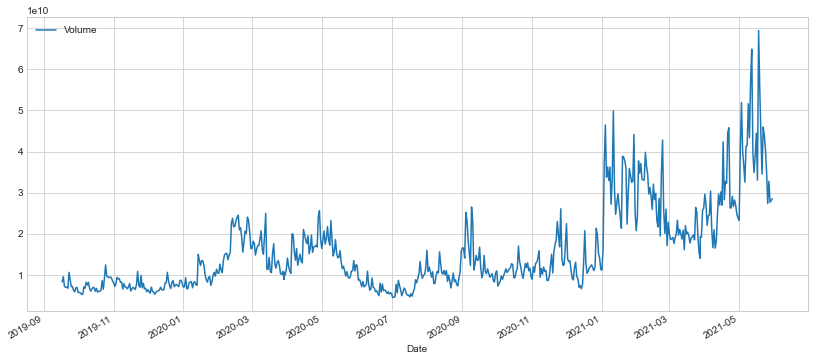

In [38]:
ethereum_volume = eth.drop(['High', 'Low', 'Open', 'Close', 'Adj Close'], axis = 1)
ethereum_volume.plot(figsize=(14,6))

<AxesSubplot:xlabel='Date'>

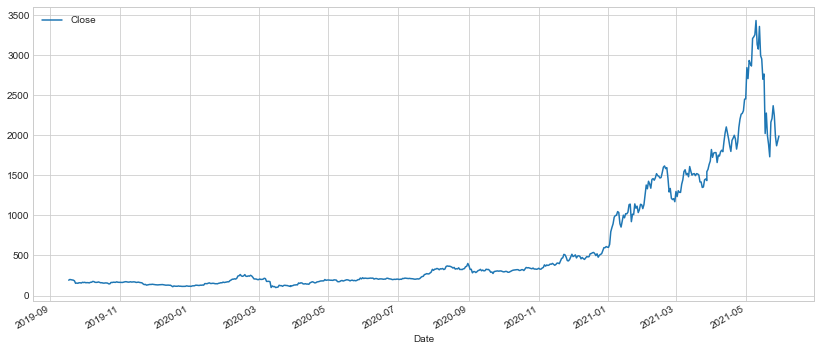

In [39]:
ethereum_close = eth.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis = 1)
ethereum_close.plot(figsize=(14,6))

In [40]:
ethereum_close.tail()

,Close
Date,
2021-05-25,2369.342529
2021-05-26,2244.328369
2021-05-27,1984.749023
2021-05-28,1869.595947
2021-05-30,1991.309814


## Ennakoiva analytiikka alkaa ("kysyntä", aikasarja)

In [41]:
# CSV https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#TARKISTA TARVITAANKO
##sepstr, default ‘,’
##usecolslist-like or callable, optional
df=pd.read_csv('http://taanila.fi/AirPassengers.csv')
##Alkuperäisen datan sijainti https://www.kaggle.com/rakannimer/air-passengers 

#Muunnetaan aikaleimoina toimivan sarakkeen tiedot aikaa osoittavaksi tietotyypiksi
#ja siirretään ne DataFramen indeksiin
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
#Poistetaan siirron jälkeen lähtötietosarake
df=df.drop('Month',axis=1)
#Kurkataan 7 viimeistä riviä niinkuin Linuxissa
df.tail(7)

,#Passengers
Month,
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


<AxesSubplot:xlabel='Month'>

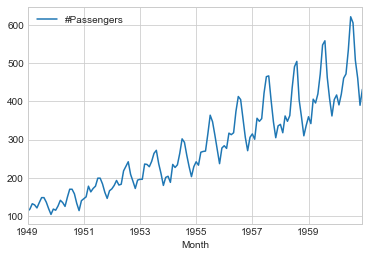

In [42]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka purkaa aikasarjoja eri komponentteihin
#from statsmodels.tsa.api import ExponentialSmoothing as exsmo
from statsmodels.tsa.api import seasonal_decompose as sead
##.tsa. = TSA eli Time Series Analysis
## https://www.statsmodels.org/stable/tsa.html

df.plot()

Yllä olevassa historiakuviossa trendi vaikuttaisi olevan nouseva ja kausittaista vaihtelua vaikuttaisi olevan säännönmukaisesti (kalenterivuositasolla vuodenaikojen tyyppisesti)

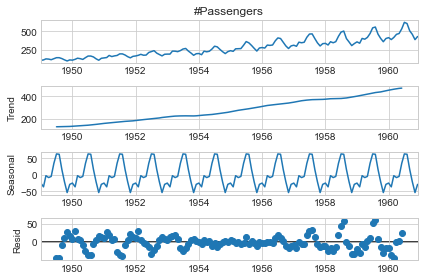

In [43]:
#Time Series Analysis APIsta noudettu seasonal_decompose
##näyttää alkuperäisen aikasarjan (observed) ja purkaa siitä erilleen trendin
##sekä kausivaihtelun (seasonal) ja näyttää lopuksi jäljelle jääneen sattumanvaraisen vaihtelun (residual)
decompose = sead(df['#Passengers']).plot()

### Ennakoivan analytiikan mallin sovitus datasettiin
Koneoppimisessa kokeillaan erilaisia algoritmeja samaan historiadataan ja katsotaan mikä niistä arvaa parhaiten, kun ennustetta verrataan jo tiedossa oleviin toteumiin    

#### 1. algoritmi kokeilu (ensimmäinen sovitusyritys: Miten malli sopii toteumaan) 

In [44]:
#Pudotetaan pois ilman arvoa olevat rivit tietyn sarakkeen osalta
df = df.dropna(subset = ['#Passengers'])

#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##"Holt Winter’s Exponential Smoothing" -malli, joka sopii kysynnän ennustamiseen aikasarjoille, joissa esiintyy 
#sekä trendi että kausivaihtelua ja sattumanvaraista vaihtelua
from statsmodels.tsa.api import ExponentialSmoothing as exsmo
## https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html#statsmodels.tsa.holtwinters.ExponentialSmoothing

#Ennustemallille annetaan parametreina:
#Trendille plussamalla summamalli (add) eli ajankohtana arvoon lisätään trendin sen hetken arvo
#(ExponentialSmoothing-mallilla annetaan aina "add"),
#Kausivaihteluun kertomalla tulomalli (mul) tai voi kokeilla myös aiempaa plussausta summamallilla (add),
#Kausivaihtelun jaksoiksi edellinen viivakaavio näytti jotakuinkin kvarttaaleita eli "seasonal_periods = 4",
#Frekvenssin ollessa kvarttaali ottaa "Q" sen viimeisen päivän; muut "freq" parametrit osoitteessa
## https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
### datassa jokainen rivi on kuukauden ensimmäinen päivä, jonka vuoksi "freq" parametriksi "MS"
malli = exsmo(df['#Passengers'], trend = 'add', seasonal = 'mul', seasonal_periods = 4, freq = 'MS').fit()
###komennolla fit() sovitetaan malli dataan. Se on se komento, jolla konetta opetetaan

#Katsotaan mallin sisältämät parametrit (matemaattiset mallit)
malli.params


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


{'smoothing_level': 0.9596425328162413,
 'smoothing_trend': 0.00010032644138833912,
 'smoothing_seasonal': 0.040357408085141586,
 'damping_trend': nan,
 'initial_level': 271.999976610949,
 'initial_trend': 3.8125139436547655,
 'initial_seasons': array([0.45899353, 0.46272202, 0.49217116, 0.48513421]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [45]:
#Muodostuneesta malli-oliosta saa käytetyn algoritmin mukaiset ennusteet (sovitetut arvot, fittedvalues)
#jo toteutuneille datalle
df['Ennuste'] = malli.fittedvalues

#Kurkataan 15 ensimmäistä riviä niinkuin Linuxissa
df.head(15)

,#Passengers,Ennuste
Month,,
1949-01-01,112,126.596147
1949-02-01,118,115.266365
1949-03-01,132,127.267744
1949-04-01,129,131.773262
1949-05-01,121,123.327344
1949-06-01,135,124.530292
1949-07-01,148,145.099158
1949-08-01,148,147.274567
1949-09-01,136,141.098953


<AxesSubplot:xlabel='Month'>

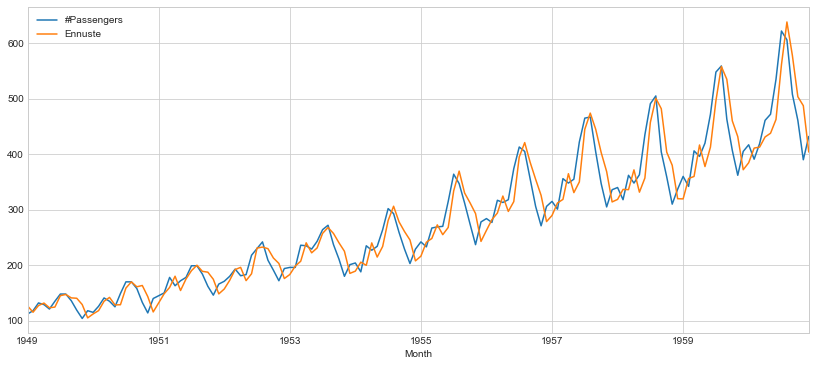

In [46]:
#Plotataan graafisena visualisointina miten ennuste osuu toteumaan 
df.plot(figsize=(14,6))

In [47]:
df['Ennustevirhe'] = malli.resid
df.head(15)

,#Passengers,Ennuste,Ennustevirhe
Month,,,
1949-01-01,112,126.596147,-14.596147
1949-02-01,118,115.266365,2.733635
1949-03-01,132,127.267744,4.732256
1949-04-01,129,131.773262,-2.773262
1949-05-01,121,123.327344,-2.327344
1949-06-01,135,124.530292,10.469708
1949-07-01,148,145.099158,2.900842
1949-08-01,148,147.274567,0.725433
1949-09-01,136,141.098953,-5.098953


#### 1. algoritmin soveltuvuuden arviointi (1/3): Kuinka paljon keskimäärin ennuste on epäkelpo

In [48]:
#Ei asenneta Anacondassa vaan kerrotaan mistä "from foo.bar" tuodaan käytettäväksi "import lorem_ipsus"
##toiminnallisuus, joka laskee ennustevirheiden neliön (luku kerrotaan itsellään eli luvun toinen potenssi)
#ja niistä keskiarvon
from sklearn.metrics import mean_squared_error

#Laskee ennustevirheiden itseisarvojen (käytännössä poistaa miinusmerkit ennustevirheistä) keskiarvon
from sklearn.metrics import mean_absolute_error

In [49]:
print('Ennustevirheiden neliön keskiarvo (mean squared error)',
      mean_squared_error(df['#Passengers'], df['Ennuste']))

print('Ennustevirheiden itseisarvojen keskiarvo (mean absolute error)',
      mean_absolute_error(df['#Passengers'], df['Ennuste']))

Ennustevirheiden neliön keskiarvo (mean squared error) 1016.1230006743667
Ennustevirheiden itseisarvojen keskiarvo (mean absolute error) 24.92514415247571


Yllä oleva "mean absolute error" kertoo montako prosenttia ennusteista epäonnistuu.
<br>
Yllä oleva "mean squared error" on paljon käytössä oleva tunnusluku, jota käytetään malleja vertaillessa


#### 1. algoritmin soveltuvuuden arviointi (2/3): Onko ennustusvirheen perusteena sattumanvaraisuus, "residual"

Text(0, 0.5, 'Ennustevirhe')

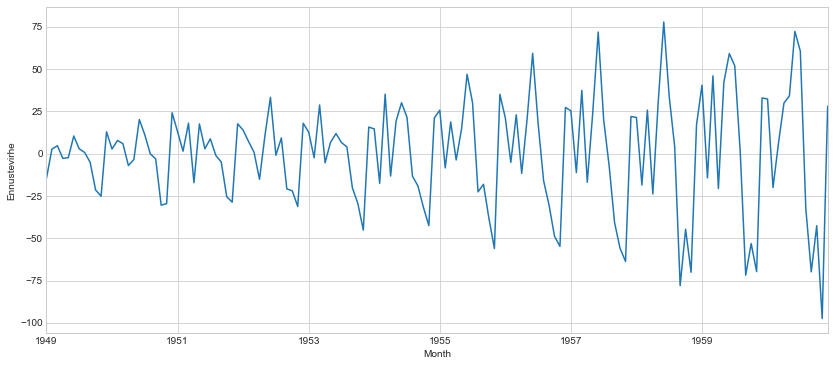

In [50]:
df['Ennustevirhe'].plot(figsize=(14,6))
plt.ylabel('Ennustevirhe')

Yllä olevassa kuviossa vaikuttaisi silmämääräisesti ennustevirhe toistuvan samankaltaisena. Mikäli niin on, kertoo se siitä, että ennustamisessa on jätetty jotain oleellista huomioimatta (tai että kannattaa kokeilla muitakin algoritmejä, jos jokin toinen malli sopisi paremmin datasettiin)

#### 1. algoritmin soveltuvuuden arviointi (3/3): Linjautuminen vrs. hajonta

Text(0, 0.5, 'Toteutunut määrä')

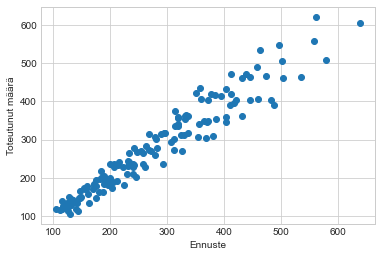

In [51]:
#Mitä enemmän hajontakaavion pisteet seuraavat suoraa viivaa vasemmasta alakulmasta
#oikeaan yläkulmaan, sitä parempi ennustemalli on
plt.scatter(x = df['Ennuste'], y = df['#Passengers'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut määrä')

Yllä olevassa kuviossa vaikuttaisi silmämääräisesti mahdollisesti olevan toivomisen varaa eli voisi harkita koettaa sovittaa myös muita malleja samaan dataan.
<br>

malli.summary()
<br>
SSE 	146321.712

<br>

Kokeilin kuitenkin ennen sitä suorittaa mallia parametreja vaihtelemalla ja lopulta ennusteet alkoivat menemään kohdalleen, kun parametrit olivat
<br>
seasonal = 'add', seasonal_periods = 12

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


Text(0, 0.5, 'Toteutunut määrä')

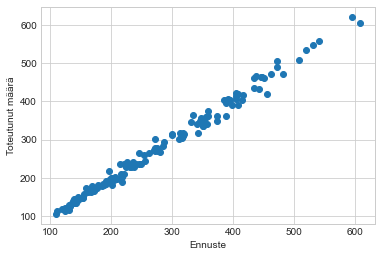

In [52]:

df=pd.read_csv('http://taanila.fi/AirPassengers.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df = df.dropna(subset = ['#Passengers'])

malli = exsmo(df['#Passengers'], trend = 'add', seasonal = 'add', seasonal_periods = 12, freq = 'MS').fit()
df['Ennuste'] = malli.fittedvalues
df['Ennustevirhe'] = malli.resid

plt.scatter(x = df['Ennuste'], y = df['#Passengers'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut määrä')

<AxesSubplot:xlabel='Month'>

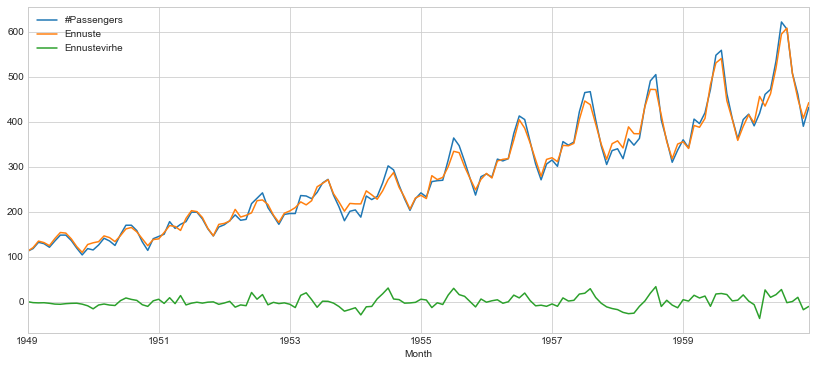

In [53]:
#Plotataan graafisena visualisointina miten ennuste osuu toteumaan 
df.plot(figsize=(14,6))
##Osumatarkkuus vaikuttaisi parantuun edellisestä yrityksestä (parametrien arvojen muuttelemisen jälkeen)

In [54]:
malli.summary()

Dep. Variable:,#Passengers,No. Observations:,144
Model:,ExponentialSmoothing,SSE,21564.941
Optimized:,True,AIC,753.298
Trend:,Additive,BIC,800.815
Seasonal:,Additive,AICC,758.770
Seasonal Periods:,12,Date:,"Sun, 30 May 2021"
Box-Cox:,False,Time:,12:48:29
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2525347,alpha,True
smoothing_trend,8.0088e-06,beta,True


##### <del><i>1. algoritmi kokeilu (ensimmäinen sovitusyritys: Miten malli sopii toteumaan)</i></del>
##### <del><i>1. algoritmin soveltuvuuden arviointi (3/3): Linjautuminen vrs. hajonta</i></del> 
#### 1. algoritmin ennustusyritys (tämä vaatisi oikeasti jatkosetin dataa, josta voidaan tarkistaa miten pieleen / onnistuneesti malli toimii)

In [55]:
#Tarkisteaan viimeinen aikaleima, jotta tiedetään mistä ajankohdasta eteen päin ennustetaan
df.tail()

,#Passengers,Ennuste,Ennustevirhe
Month,,,
1960-08-01,606,608.231486,-2.231486
1960-09-01,508,507.657072,0.342928
1960-10-01,461,451.326173,9.673827
1960-11-01,390,407.931774,-17.931774
1960-12-01,432,442.600355,-10.600355


In [56]:
#Pandas kirjaston komento date_range() luo aikasarjoja.
#Annetaan luotavan aikasarjan aloitushetkeksi ensimmäinen toistaiseksi tietämätön ajankohta,
#ja muodostetaan siitä alkaen indeksiin sarja aikaleimoja jaksolle 12 kuukautta ja ilmaistaan, että
#arvoajankohta on tässä tapauksessa kuukauden ensimmäinen päivä
index_oma_tekele = pd.date_range('1961-01-01', periods = 12, freq = 'MS')

#malli-olion forecast-toiminnolla voidaan laskea ennusteet halutullu ajanjaksolle
kristallipallo = malli.forecast(12)

#Sijoitetaan luodut arvuuttelut dataframeen
df_ennuste = pd.DataFrame(data = kristallipallo, index = index_oma_tekele, columns = ['Ennuste'])
df_ennuste

,Ennuste
1961-01-01,451.578321
1961-02-01,427.259231
1961-03-01,464.701351
1961-04-01,500.103858
1961-05-01,508.662278
1961-06-01,567.715577
1961-07-01,647.898763
1961-08-01,632.463359
1961-09-01,534.376622
1961-10-01,484.933253


<AxesSubplot:xlabel='Month'>

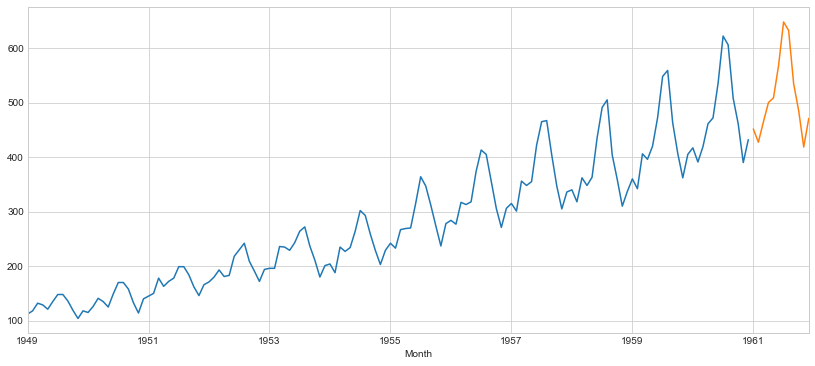

In [57]:
#Katsotaan miltä historiatieto ja tulevaisuuden ennustumainen näyttävät plotattuna graafiseen visualisointiin
df['#Passengers'].plot(figsize=(14,6))
df_ennuste['Ennuste'].plot(figsize=(14,6))

Yllä olevassa kaaviossa vaikuttaa ainakin silmämääräisesti ennuste kehittyvän historiaan pohjautuen vaikkakaan se ei tietenkään kerro mitään siitä miten tulevasiuus sitten ihan oikeasti muodostuu (tulee vaikka korona tms, joka muuttaa ihmisten käyttäytymistä)

In [58]:
#Liitetään konkatenoinnilla sarakket uuteen taulukkoon
df1 = pd.concat([df, df_ennuste])
df1.tail(15)

,#Passengers,Ennuste,Ennustevirhe
1960-10-01,461.0,451.326173,9.673827
1960-11-01,390.0,407.931774,-17.931774
1960-12-01,432.0,442.600355,-10.600355
1961-01-01,NaN,451.578321,NaN
1961-02-01,NaN,427.259231,NaN
1961-03-01,NaN,464.701351,NaN
1961-04-01,NaN,500.103858,NaN
1961-05-01,NaN,508.662278,NaN
1961-06-01,NaN,567.715577,NaN
1961-07-01,NaN,647.898763,NaN


## Ennakoiva analytiikka loppuu ("kysyntä", aikasarja)

<font color = 'grey'>Edellä olleen kolminkertaisen esponentiaalisen tasotuksen menetelmän lisäksi on olemassa niin sanottuja arima-menetelmiä. Niiden tuoma lisäarvo suhteessa algoritmin suorittamisen nopeuteen ja parametrien asettamisen vaikeuteen on, ainakin liiketaloudessa, usein vähäinen (ehkä sote-sektorilla tai muilla toimialoilla niitä hyödynnetään)</font><br>
https://video.haaga-helia.fi/media/Aikasarjaennustaminen/0_jmkalqva

In [59]:
from datetime import datetime
print(f'Lopeteltu {datetime.now()}')


Lopeteltu 2021-05-30 12:48:29.753809
